Import the drive module to mount Google Drive within a Colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary libraries (numpy, pandas, matplotlib, xgboost, sklearn)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

Display all the columns in the dataset, since pandas by default truncates the number of columns displayed


In [ ]:
pd.set_option('display.max_columns', None)

Read the CSV file from the Google Drive path.

In [ ]:
df = pd.read_csv("drive/MyDrive/thesis/thesis/cleaned_and_mergedfinal.csv")

Display first few rows of the dataset

In [ ]:
df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_count,private_bath,shared_bath,half_bath,price_estimate,delay
0,0,within an hour,93.454699,100.0,False,Unknown,1.0,1.0,True,True,Wandsworth,51.44201,-0.18739,Private room in rental unit,Private room,2,1.785253,2.0,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",42.0,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,216,9,0,4.57,4.74,4.86,4.71,4.67,4.53,4.68,True,1,0,1,0,1.5,0.0,1.0,0.0,1.421017e+06,93.982581
1,1,within a few hours,100.000000,25.0,False,Hammersmith,1.0,2.0,True,True,Hammersmith and Fulham,51.49993,-0.21707,Entire rental unit,Entire home/apt,5,2.000000,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",175.0,5,240,5.0,5.0,240.0,240.0,5.0,240.0,True,38,2,0,4.82,4.76,4.62,4.85,4.88,4.85,4.74,False,1,1,0,0,1.0,0.0,0.0,0.0,5.749781e+05,15.796101
2,2,within a few hours,100.000000,88.0,False,LB of Islington,3.0,4.0,True,True,Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,1.785253,1.0,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",79.0,1,29,1.0,1.0,29.0,29.0,1.0,29.0,True,41,11,0,4.80,4.72,4.72,4.74,4.82,4.69,4.69,False,2,1,1,0,1.0,0.0,1.0,0.0,8.071072e+05,100.000000
3,3,within a day,100.000000,41.0,False,Chelsea,1.0,12.0,True,True,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.000000,1.0,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",150.0,7,30,7.0,7.0,30.0,30.0,7.0,30.0,True,94,5,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,False,1,1,0,0,1.0,0.0,0.0,0.0,1.075927e+06,21.604951
4,4,within a few hours,90.000000,75.0,True,Greenwich,1.0,1.0,True,True,Greenwich,51.47618,0.01442,Private room in condo,Private room,2,1.785253,1.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",46.0,4,365,2.0,4.0,365.0,365.0,4.0,365.0,True,180,25,3,4.62,4.70,4.59,4.63,4.81,4.64,4.67,False,1,0,1,0,1.0,0.0,1.0,0.0,3.112058e+05,19.898066


Frequency of eaach unique value in the "host_response_time" column of the dataset

In [ ]:
df["host_response_time"].value_counts()

within an hour        68007
within a few hours    11369
within a day           6591
a few days or more     1979
Name: host_response_time, dtype: int64

<Axes: >

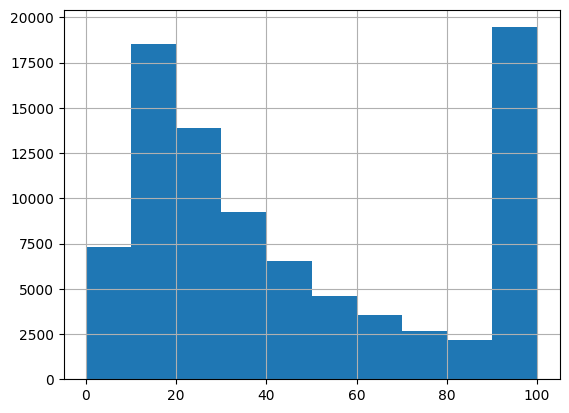

In [ ]:
df["delay"].hist()



Filter the dataframe to include only rows where the value in the "delay" columns is less than 90

In [ ]:
df = df[df["delay"]<90]

In [ ]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

<ipython-input-104-467a2d66da1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["Unnamed: 0"], inplace = True)


In [ ]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_count,private_bath,shared_bath,half_bath,price_estimate,delay
1,within a few hours,100.000000,25.0,False,Hammersmith,1.0,2.0,True,True,Hammersmith and Fulham,51.49993,-0.21707,Entire rental unit,Entire home/apt,5,2.000000,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",175.0,5,240,5.0,5.0,240.0,240.0,5.0,240.0,True,38,2,0,4.82,4.76,4.62,4.85,4.88,4.85,4.74,False,1,1,0,0,1.0,0.0,0.0,0.0,5.749781e+05,15.796101
3,within a day,100.000000,41.0,False,Chelsea,1.0,12.0,True,True,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.000000,1.0,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",150.0,7,30,7.0,7.0,30.0,30.0,7.0,30.0,True,94,5,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,False,1,1,0,0,1.0,0.0,0.0,0.0,1.075927e+06,21.604951
4,within a few hours,90.000000,75.0,True,Greenwich,1.0,1.0,True,True,Greenwich,51.47618,0.01442,Private room in condo,Private room,2,1.785253,1.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",46.0,4,365,2.0,4.0,365.0,365.0,4.0,365.0,True,180,25,3,4.62,4.70,4.59,4.63,4.81,4.64,4.67,False,1,0,1,0,1.0,0.0,1.0,0.0,3.112058e+05,19.898066
5,within an hour,100.000000,100.0,True,Fitzrovia,10.0,32.0,True,True,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,3.000000,3.0,"[""Single level home"", ""Bathtub"", ""Hot water ke...",476.0,3,365,3.0,3.0,365.0,365.0,3.0,365.0,True,54,4,0,4.76,4.83,4.71,4.71,4.71,4.88,4.60,False,9,9,0,0,2.0,0.0,0.0,0.0,1.600000e+06,21.008403
7,within an hour,93.454699,0.0,False,Battersea,1.0,3.0,True,True,Wandsworth,51.47072,-0.16266,Entire townhouse,Entire home/apt,3,1.000000,1.0,"[""Bathtub"", ""Free dryer \u2013 In unit"", ""Hot ...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,96,0,0,4.90,4.89,4.91,4.90,4.93,4.59,4.65,False,1,1,0,0,1.5,0.0,0.0,0.0,1.128839e+06,12.542650


Calculate the percentage of properties with less than 5 listings, between 5 and 100 listing

In [ ]:
# Calculate the percentage of properties with <= 5 listings
percent_less_equal_5 = (df['host_listings_count'] <= 5).mean() * 100

# Calculate the percentage of properties with > 5 and <= 100 listings
percent_less_equal_100 = (df['host_listings_count'] > 5) & (df['host_listings_count'] <= 100)
percent_less_equal_100 = percent_less_equal_100.mean() * 100

# Print the results
print(f"Percentage of properties owned by hosts with 5 or fewer listings: {percent_less_equal_5:.2f}%")
print(f"Percentage of properties owned by hosts with more than 5 and up to 100 listings: {percent_less_equal_100:.2f}%")

# Binning the data
# Creating boolean features based on the host_listing_count
df['bin_<=5'] = df['host_listings_count'] <= 5
df['bin_6-100'] = (df['host_listings_count'] > 5) & (df['host_listings_count'] <= 100)
df['bin_>100'] = df['host_listings_count'] > 100

# Now df includes the binned variables as new columns


Percentage of properties owned by hosts with 5 or fewer listings: 74.43%
Percentage of properties owned by hosts with more than 5 and up to 100 listings: 20.37%


<ipython-input-106-2ba41c92a0e5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_<=5'] = df['host_listings_count'] <= 5
<ipython-input-106-2ba41c92a0e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_6-100'] = (df['host_listings_count'] > 5) & (df['host_listings_count'] <= 100)
<ipython-input-106-2ba41c92a0e5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Analysing the distribuition of the host listings count

In [ ]:
# Analysing the distribution
total_properties = df.shape[0]
properties_5_or_less = df[df['host_listings_count'] <= 5].shape[0]
properties_more_than_100 = df[df['host_listings_count'] > 100].shape[0]

percentage_5_or_less = (properties_5_or_less / total_properties) * 100
percentage_more_than_100 = (properties_more_than_100 / total_properties) * 100

print(f"Percentage of properties owned by hosts with 5 or less properties: {percentage_5_or_less}%")
print(f"Percentage of properties owned by hosts with more than 100 properties: {percentage_more_than_100}%")



Percentage of properties owned by hosts with 5 or less properties: 74.42937044555106%
Percentage of properties owned by hosts with more than 100 properties: 5.197365538794048%


Calculate percentage of properties with less than 6 beds, 6 bedrooms and 6 bathrooms

In [ ]:
# Define the thresholds
beds_threshold = 6
bedrooms_threshold = 6
bathrooms_threshold = 6

# Calculate the percentages
total_properties = df.shape[0]
percent_beds_less_than_threshold = (df[df['beds'] < beds_threshold].shape[0] / total_properties) * 100
percent_bedrooms_less_than_threshold = (df[df['bedrooms'] < bedrooms_threshold].shape[0] / total_properties) * 100
percent_bathrooms_less_than_threshold = (df[df['bathrooms_count'] < bathrooms_threshold].shape[0] / total_properties) * 100

print(f"Percentage of properties with less than {beds_threshold} beds: {percent_beds_less_than_threshold:.2f}%")
print(f"Percentage of properties with less than {bedrooms_threshold} bedrooms: {percent_bedrooms_less_than_threshold:.2f}%")
print(f"Percentage of properties with less than {bathrooms_threshold} bathrooms: {percent_bathrooms_less_than_threshold:.2f}%")



Percentage of properties with less than 6 beds: 98.38%
Percentage of properties with less than 6 bedrooms: 99.73%
Percentage of properties with less than 6 bathrooms: 99.95%


Check how many different property types there are in the dataset

In [ ]:
unique_property_types = df['property_type'].nunique()
print(f"There are {unique_property_types} different property types in the dataset.")


There are 85 different property types in the dataset.


Check how many properties types appear less than 10 times in the dataset

In [ ]:
less_than_10 = (df['property_type'].value_counts() < 10).sum()
print(f"There are {less_than_10} property types that appear less than 10 times in the dataset.")


There are 41 property types that appear less than 10 times in the dataset.




*   Calculate the percentage of properties owned by superhosts
*   Calculate the percentage of hosts response time
*   Calculate the percentage of properties in Westminster
*   Calculate distribution of homes between the London boroughs
*   Calculate the percentage of hosts with proper identity verification and a set profile picture
*   Calculate the percentage of properties with host_neighbourhood set to “Unknown”



In [ ]:

# Calculating the percentage of properties owned by superhosts
superhost_count = df['host_is_superhost'].value_counts(normalize=True) * 100

# Calculating the percentage of hosts response time
response_time_stats = df['host_response_time'].value_counts(normalize=True) * 100

# Calculating the percentage of properties in Westminster
westminster_count = (df['neighbourhood_cleansed'] == 'Westminster').sum() / len(df) * 100

# Distribution of homes between the London boroughs
borough_market_share = df['neighbourhood_cleansed'].value_counts(normalize=True) * 100
top_8_boroughs_share = borough_market_share.head(8).sum()
bottom_12_boroughs_share = borough_market_share.tail(12).sum()

# Calculating the percentage of hosts with proper identity verification and a set profile picture
verified_and_picture_count = df[(df['host_has_profile_pic'] == True) & (df['host_identity_verified'] == True)].shape[0] / len(df) * 100

# Calculating the percentage of properties with host_neighbourhood set to “Unknown”
unknown_neighbourhood_count = (df['host_neighbourhood'] == 'Unknown').sum() / len(df) * 100

print(f"Superhost Properties: {superhost_count}% of all Airbnb properties are owned by superhosts.")
print("Host Response Times:")
print(f"  - Within an hour: {response_time_stats['within an hour']:.2f}%")
print(f"  - Within a few hours: {response_time_stats['within a few hours']:.2f}%")
print(f"  - Within a day: {response_time_stats['within a day']:.2f}%")
print(f"Westminster Properties: {westminster_count:.2f}% of all properties are located in Westminster.")
print(f"London Borough Distribution:")
print(f"  - Top 8 boroughs represent: {top_8_boroughs_share:.2f}% of the market")
print(f"  - Bottom 12 boroughs represent: {bottom_12_boroughs_share:.2f}% of the market")
print(f"Verified Hosts with Profile Pictures: {verified_and_picture_count:.2f}% of all hosts have verified identities and profile pictures.")
print(f"'Unknown' Neighbourhoods: {unknown_neighbourhood_count:.2f}% of properties have their host_neighbourhood set to 'Unknown'.")



Superhost Properties: False    84.664924
True     15.335076
Name: host_is_superhost, dtype: float64% of all Airbnb properties are owned by superhosts.
Host Response Times:
  - Within an hour: 80.11%
  - Within a few hours: 11.97%
  - Within a day: 6.68%
Westminster Properties: 11.47% of all properties are located in Westminster.
London Borough Distribution:
  - Top 8 boroughs represent: 58.39% of the market
  - Bottom 12 boroughs represent: 8.22% of the market
Verified Hosts with Profile Pictures: 84.74% of all hosts have verified identities and profile pictures.
'Unknown' Neighbourhoods: 46.90% of properties have their host_neighbourhood set to 'Unknown'.


Perform type conversion

In [ ]:
df["instant_bookable"] = df["instant_bookable"].astype("bool")
df["has_availability"] = df["has_availability"].astype("bool")

Plot the accomodates column

<Axes: >

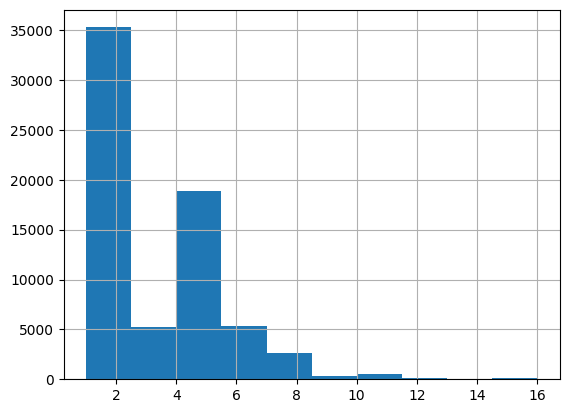

In [ ]:
df["accommodates"].hist()

Count each unique value of the neighbourhood inclusing only those where the count is less than 1000

In [ ]:
df["neighbourhood_cleansed"].value_counts()[df["neighbourhood_cleansed"].value_counts()<1000]

Hounslow                919
Redbridge               582
Kingston upon Thames    572
Bromley                 548
Hillingdon              530
City of London          493
Enfield                 465
Harrow                  365
Barking and Dagenham    360
Bexley                  289
Sutton                  272
Havering                233
Name: neighbourhood_cleansed, dtype: int64

Find out what fraction of the dataset is represented by neighborhoods that are more prevalent (more than 5% of entries) in the "neighbourhood_cleansed" column

In [ ]:
df["neighbourhood_cleansed"].value_counts()[(df["neighbourhood_cleansed"].value_counts()/len(df))>.05].sum()/len(df)

0.5838602742526687

Calculate the total number of different property types

In [ ]:
len(df["property_type"].unique())

85

Caculate the total number of different property types in the dataset that appear more than 10 times

In [ ]:
len(df["property_type"].value_counts()[df["property_type"].value_counts()>10])

44

Identify and list the property types in the dataset that are more common (occur more than 1000 times)

In [ ]:
filtered = df["property_type"].value_counts()[df["property_type"].value_counts()>1000]
filtered

Entire rental unit             28620
Private room in rental unit    10432
Entire condo                    7162
Private room in home            6827
Entire home                     6336
Private room in condo           2159
Entire serviced apartment       1602
Entire townhouse                1001
Name: property_type, dtype: int64

Relative frequency of each room type in the dataset

<Axes: >

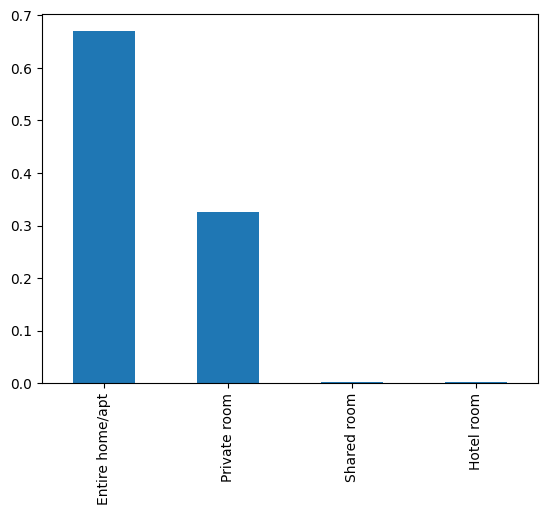

In [ ]:
(df["room_type"].value_counts()/len(df)).plot(kind = "bar")

The majority of houses make their value dack in less than 400 months (33 years). It is the case that some go way beyond that to 1400 months. This can be attributed to how people set their renting prices, some set them too high, some set them too low. However, the majority of delays should reflect the reality of the expected delays as people will adapt their pricing to match the market.

Let's start by replacing amenities with the number of amenities. The initial feature would require NLP to properly evaluate all the ameties and their contribution. However, getting the  number of amenities as an estimate gives information on how much added comfort the landlord is trying to give to the tenant.

In [ ]:
len(df[df["delay"]>400])/len(df)*100

0.0

<Axes: >

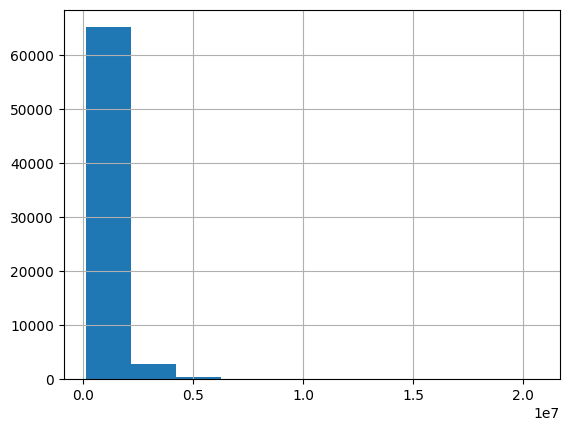

In [ ]:
df["price_estimate"].hist()

How many listings in the dataset adhere to a maximum or a minimum duration of 30 days or less

In [ ]:


# Define the features related to the number of nights
nights_features = [
    'minimum_nights', 'maximum_nights', 'minimum_maximum_nights',
    'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_minimum_nights'
]

# Define the threshold
threshold = 30

# Initialize a dictionary to store the percentages
percentages = {}

# Calculate the percentage of entries that have a value of at most 30 days for each feature
for feature in nights_features:
    count_at_most_threshold = df[df[feature] <= threshold].shape[0]
    total_count = df.shape[0]
    percentages[feature] = (count_at_most_threshold / total_count) * 100

# Output the percentages for each feature
for feature, percent in percentages.items():
    print(f"{feature}: {percent:.2f}% of entries are at most {threshold} days.")



minimum_nights: 98.72% of entries are at most 30 days.
maximum_nights: 23.05% of entries are at most 30 days.
minimum_maximum_nights: 19.29% of entries are at most 30 days.
maximum_minimum_nights: 95.89% of entries are at most 30 days.
maximum_maximum_nights: 17.97% of entries are at most 30 days.
minimum_minimum_nights: 98.67% of entries are at most 30 days.


Deal with amenities text and convert into meaningful numbers information:

*   Remove leading and trailing character though [1:-1] slice, thus getting rid of the list brackets '[' and ']'
*   Splitting by space, as that character is used to separate the amenities
*   Computing the length of the result, resulting in the number of amenities

In [ ]:
def count_amenities(amenities):
  return len(amenities[1:-1].split(","))

In [ ]:
sett = set()
for amen in df["amenities"]:
  for elem in amen[1:-1].split(","):
    sett.add(elem)

In [ ]:
[x for x in sett if "sure" in x][:10]

[' "Not sure body soap"',
 ' "Not sure shampoo"',
 ' "Leisure stainless steel double oven"',
 ' "Not sure yet  shampoo"',
 ' "Unsure  refrigerator"',
 ' "Please make sure you close the fridge door \\u263a\\ufe0f refrigerator"',
 '"Not sure! conditioner"',
 ' "Not sure refrigerator"',
 ' "Unsure body soap"',
 ' "Not sure conditioner"']

In [ ]:
df["amenity_count"] = df["amenities"].apply(count_amenities)

In [ ]:
df.drop(columns = ["amenities"], inplace = True)

In [ ]:
categorical_features = ["host_response_time", "host_is_superhost", "host_neighbourhood", "host_has_profile_pic", "host_identity_verified", "neighbourhood_cleansed","room_type", "property_type"]
numerical_features = [x for x in df.columns if not(x in categorical_features)]
numerical_features.remove("delay")

# Exploration

Correlation of the target feature (delay) and each of the numerical features

In [ ]:
good_num = []
for feature in numerical_features:
    # Ensure the feature is numeric by trying to convert it to a float
    try:
        df[feature] = df[feature].astype(float)
        correlation = df["delay"].corr(df[feature]).round(2)
        print("The correlation between delay and {} is {}%".format(feature, correlation * 100))
        if correlation > 0.01:
            good_num.append(feature)
    except ValueError:
        # If the conversion fails, the feature is not numeric and will be skipped
        print("Skipping non-numeric feature:", feature)




The correlation between delay and host_response_rate is -1.0%
The correlation between delay and host_acceptance_rate is -1.0%
The correlation between delay and host_listings_count is -11.0%
The correlation between delay and host_total_listings_count is -10.0%
The correlation between delay and latitude is 3.0%
The correlation between delay and longitude is -2.0%
The correlation between delay and accommodates is -20.0%
The correlation between delay and bedrooms is 3.0%
The correlation between delay and beds is -15.0%
The correlation between delay and price is -12.0%
The correlation between delay and minimum_nights is -1.0%
The correlation between delay and maximum_nights is 0.0%
The correlation between delay and minimum_minimum_nights is -2.0%
The correlation between delay and maximum_minimum_nights is -2.0%
The correlation between delay and minimum_maximum_nights is 1.0%
The correlation between delay and maximum_maximum_nights is 1.0%
The correlation between delay and minimum_nights_avg

Interestingly, only the shared_bath feature exhibits a correlation greater than 20% with the delay. It's important to note that a negative correlation indicates a positive impact on the property's investment potential. This means that higher values of the variable are beneficial, as a lower delay is preferable for quicker return on investment.


Histograms with each subplot presenting the distribuition of delay for a different property type, focusing on the 9 mmost common property types

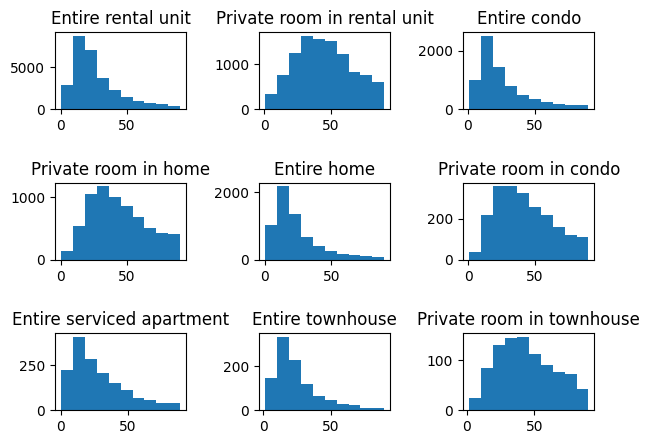

In [ ]:

vals = list(df["property_type"].value_counts()[:9].index.values)

fig, axs = plt.subplots(3, 3)
i = 0
for rtype in vals:
  axs[i//3,i%3].hist(df[df["property_type"] == rtype]["delay"])
  axs[i//3,i%3].set_title ("{}".format(rtype))
  i+=1
fig.tight_layout(pad=2.0)
fig.show()

Couting the 9 most common property types

In [ ]:
df["property_type"].value_counts()[:9]


Entire rental unit             28620
Private room in rental unit    10432
Entire condo                    7162
Private room in home            6827
Entire home                     6336
Private room in condo           2159
Entire serviced apartment       1602
Entire townhouse                1001
Private room in townhouse        925
Name: property_type, dtype: int64

Histogram of the "delay" values for properties in the dataset that are marked as available

<Axes: >

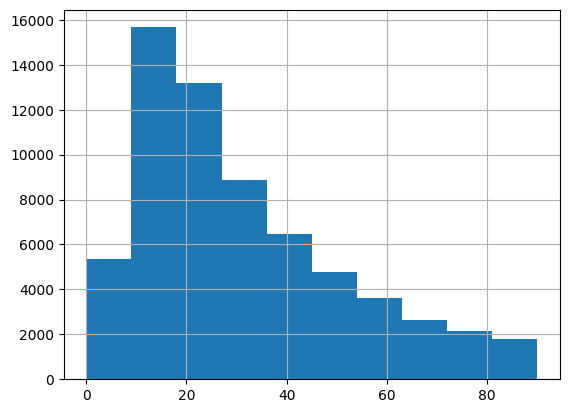

In [ ]:
df[df["has_availability"] == True]["delay"].hist()

2x2 grid of histograms, with each subplot showing the distribution of "delay" for a different room type in the dataset

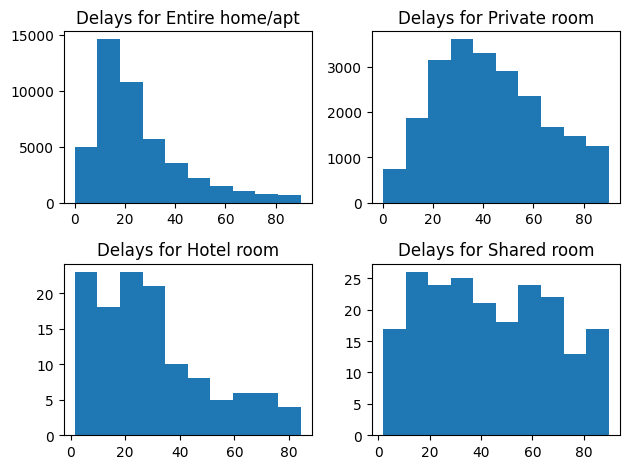

In [ ]:
fig, axs = plt.subplots(2, 2)
i = 0
for rtype in df["room_type"].unique():
  axs[i//2,i%2].hist(df[df["room_type"] == rtype]["delay"])
  axs[i//2,i%2].set_title ("Delays for {}".format(rtype))
  i+=1
fig.tight_layout()
fig.show()

Scatter plot displays individual points, each representing a property, with its position determined by how many people it accommodates and its associated delay value.

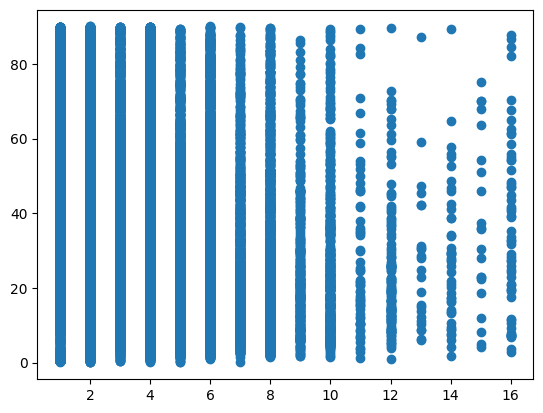

In [ ]:
plt.scatter(df["accommodates"],df["delay"])

Histogram of "delay" values for properties in the dataset that are not available for instant booking.

<Axes: >

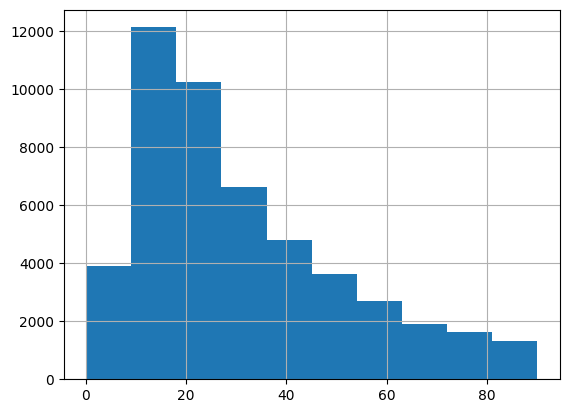

In [ ]:
df[df["instant_bookable"] == False]["delay"].hist()

Histogram provides a visual representation of the distribution of review counts over the last year

<Axes: >

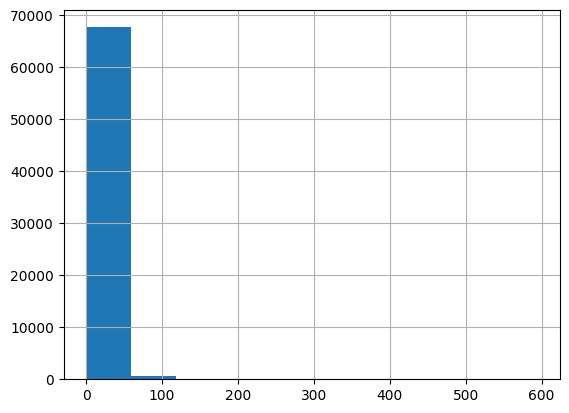

In [ ]:
df["number_of_reviews_ltm"].hist()

In [ ]:
from scipy import stats
res = stats.spearmanr(df["delay"], df["neighbourhood_cleansed"])

In [ ]:
good_cat = []
for feature in categorical_features:
  res = stats.spearmanr(df["delay"], df[feature])
  print("Correlation of delay/{} is {}%".format(feature, abs(res.statistic.round(2))*100))

  if res.statistic>.01: good_cat.append(feature)



Correlation of delay/host_response_time is 1.0%
Correlation of delay/host_is_superhost is 1.0%
Correlation of delay/host_neighbourhood is 4.0%
Correlation of delay/host_has_profile_pic is 0.0%
Correlation of delay/host_identity_verified is 1.0%
Correlation of delay/neighbourhood_cleansed is 1.0%
Correlation of delay/room_type is 41.0%
Correlation of delay/property_type is 37.0%


It appears that features directly associated with the property, such as 'room_type' and 'property_type,' significantly influence the delay, with 'property_type' showing a substantial 37% correlation. In contrast, factors related to the host's characteristics, such as 'host_is_superhost,' seem to have minimal impact on the delay. This aligns with the intuitive notion that prospective tenants prioritize property specifics over the host's status when making rental decisions.

Time to check feature distribuitions to understand more about the dataset

In [ ]:
df["bathrooms_count"].value_counts()

1.0     47429
2.0      9092
1.5      7356
2.5      2316
3.0      1086
3.5       581
4.0       203
0.0       174
4.5       118
5.0        53
5.5        32
6.5        11
6.0        10
7.5         3
7.0         3
8.0         2
9.0         2
12.0        2
17.0        1
10.5        1
8.5         1
9.5         1
Name: bathrooms_count, dtype: int64

<Axes: >

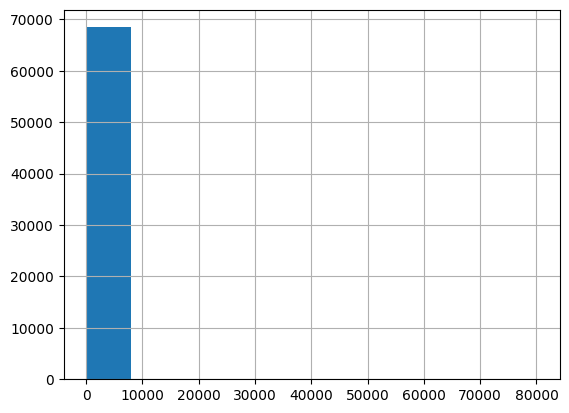

In [ ]:
df["price"].hist()

A distribution with this shape suggests the presence of outliers, which can significantly impact the model's predictive accuracy for the target variable.

In [ ]:
df["price"].max()

80100.0

In [ ]:
percentage_above_1000 = (df[df["price"] > 1000].shape[0] / df.shape[0]) * 100
percentage_above_1000

1.5


Since only 1.5% of the properties cost more than 1000, setting their prices to 1000 could help make our model's predictions better.

<Axes: >

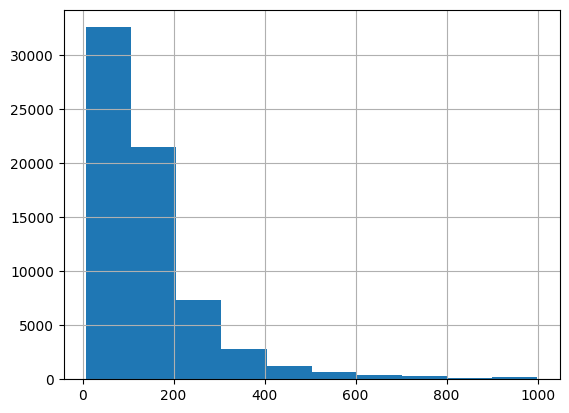

In [ ]:
df[df["price"]<1000]["price"].hist()

In [ ]:
df.loc[df["price"]>1000,"price"] = 1000

In [ ]:
correlation = (df["delay"].corr(df["price"])).round(2)
print("the correlation between delay and price is {}%".format(correlation*100))

the correlation between delay and price is -28.000000000000004%


As we can see, the correlation between price and delay improved from -12% to -28% after outlier elimination.

Price estimate histogram to check for outliers

<Axes: >

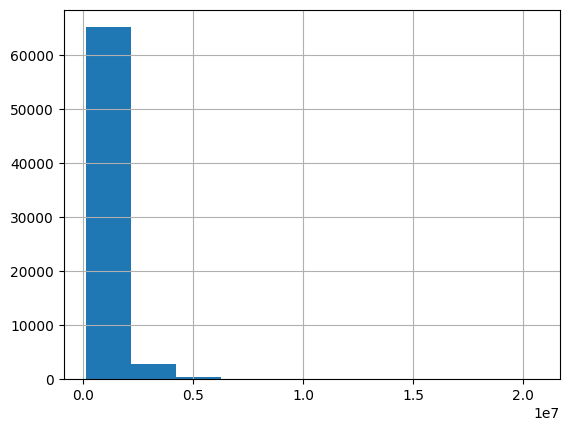

In [ ]:
df["price_estimate"].hist()

Price estimate has outliers that need to be removed

Histogram to show how many properties fall within different price ranges up to 4 million

<Axes: >

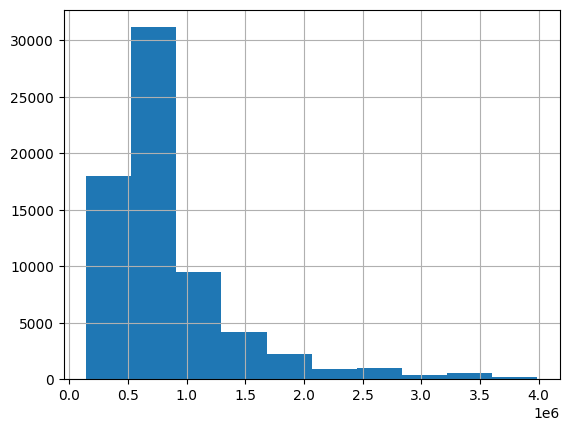

In [ ]:
df[df["price_estimate"]<1e7*4/10]["price_estimate"].hist()

Check how many values there are above 5 million in percentage

In [ ]:
len(df[df["price_estimate"]>1e7/2])/len(df)

0.004322619273624721

Caps the price estimate the 5 million since only 0.004% of the properties are above 5 million

In [ ]:
df.loc[df["price_estimate"]>1e7/2,"price_estimate"] = 1e7/2

Check the correlation between buying price and delay

In [ ]:
correlation = (df["delay"].corr(df["price_estimate"])).round(2)
print("the correlation between delay and buying price is {}%".format(correlation*100))

the correlation between delay and buying price is 15.0%


Check if longitude and latitude present meaningful information when visualised

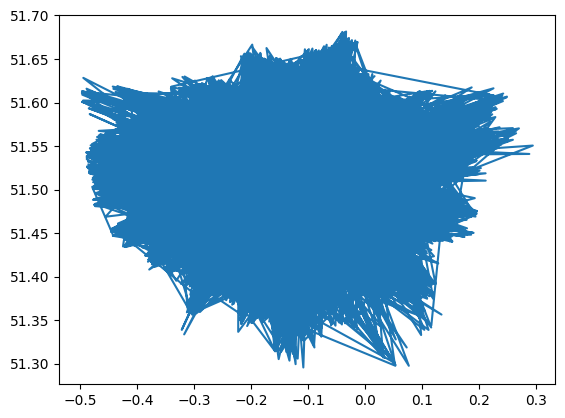

In [ ]:
plt.plot(df["longitude"], df["latitude"])

Fraction of total listings that are hosted by superhosts

In [ ]:
len(df[df["host_is_superhost"] == True])/len(df)

0.15335076010923376

Latitude histogram

<Axes: >

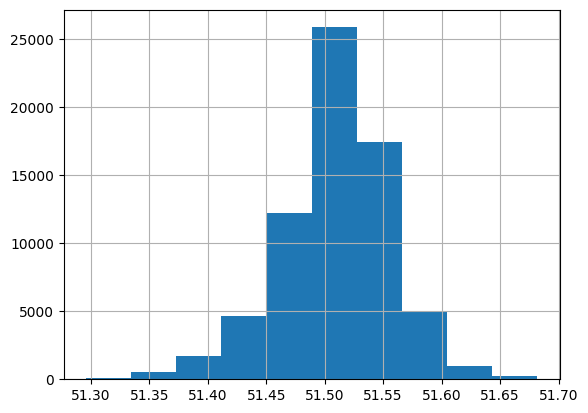

In [ ]:
df["latitude"].hist()

Cleanliness scores histogram

<Axes: >

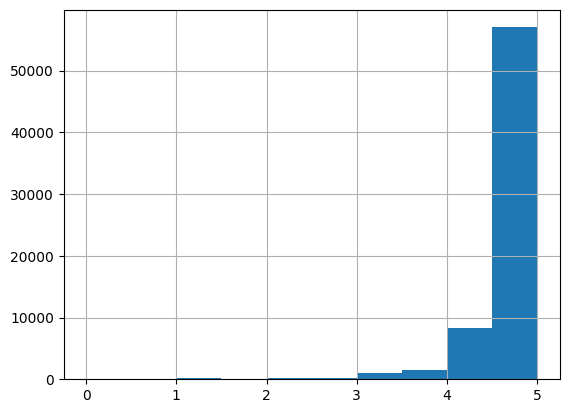

In [ ]:
df["review_scores_cleanliness"].hist()

Number of beds histogram

<Axes: >

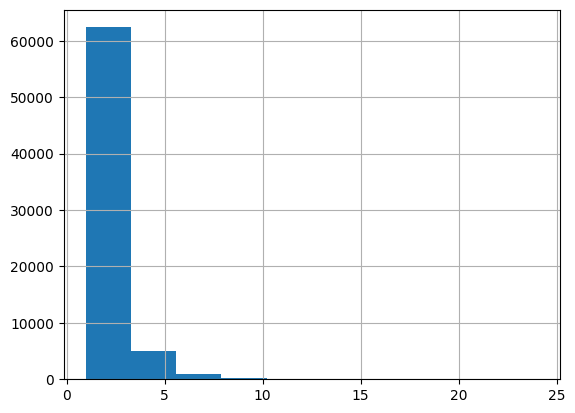

In [ ]:
df["beds"].hist()

Cap the bedrooms to less than 6 since they represent 0.99 of the bedrooms amount in the dataset

In [ ]:
len(df[df["bedrooms"]<6]["bedrooms"])/len(df)

0.9972691560670006

In [ ]:
df["bathrooms_count"].max()

17.0

The number of beds in properties is distinctly segmented into separate categories, as expected since bed count is a whole number. Accordingly, it is logical to create distinct boolean features for each bed count, ranging from:

properties with 1 bed,
properties with 2 beds,
...
to properties with more than 4 beds.

In [ ]:
for i in range(1,5):
  df["bed_count_"+str(i)] = ((df["beds"]>(i-.5)) & (df["beds"]<(i+.5))).astype("bool")

df["bed_count_5_+"] = (df["beds"]>4.5).astype("bool")

In [ ]:
for i in range(1,6):
  df["bathroom_count_"+str(i)] = ((df["bathrooms_count"]>(i-.5)) & (df["bathrooms_count"]<(i+.5))).astype("bool")

df["bathroom_count_5_+"] = (df["bathrooms_count"]>5.5).astype("bool")

Correlation with each one of the bathroom counts

In [ ]:
for feature in df.columns:
  if feature.startswith("bathroom_count_"):
    res = stats.spearmanr(df["delay"], df[feature])
    print("Correlation of delay/{} is {}%".format(feature, abs(res.statistic.round(2))*100))

Correlation of delay/bathroom_count_1 is 1.0%
Correlation of delay/bathroom_count_2 is 2.0%
Correlation of delay/bathroom_count_3 is 2.0%
Correlation of delay/bathroom_count_4 is 0.0%
Correlation of delay/bathroom_count_5 is 1.0%
Correlation of delay/bathroom_count_5_+ is 0.0%


In [ ]:
df["bed_count_1"].value_counts()

True     36060
False    32417
Name: bed_count_1, dtype: int64

Correlation with each one of the bed counts

In [ ]:
for feature in df.columns:
  if feature.startswith("bed_count"):
    res = stats.spearmanr(df["delay"], df[feature])
    print("Correlation of delay/{} is {}%".format(feature, abs(res.statistic.round(2))*100))

Correlation of delay/bed_count_1 is 21.0%
Correlation of delay/bed_count_2 is 12.0%
Correlation of delay/bed_count_3 is 8.0%
Correlation of delay/bed_count_4 is 6.0%
Correlation of delay/bed_count_5_+ is 6.0%


The 'bed_count_1' feature demonstrates a 20% correlation, outperforming the correlation of the original 'beds' feature when considered independently.

<Axes: >

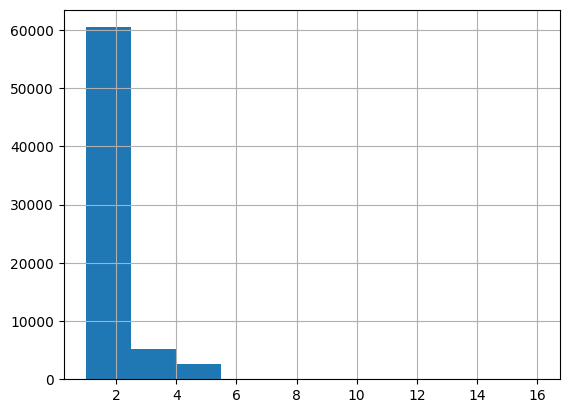

In [ ]:
df["bedrooms"].hist()

In [ ]:
df["bedrooms"].value_counts()

1.000000     22852
1.785253     22336
2.000000     15266
3.000000      5196
4.000000      2038
5.000000       602
6.000000       129
7.000000        32
8.000000        13
10.000000        5
9.000000         3
15.000000        2
14.000000        1
16.000000        1
12.000000        1
Name: bedrooms, dtype: int64

Caculate the propotion of listings where both the host has a probile picture and their identity has been verified

In [ ]:
len(df[df["host_has_profile_pic"] == True][df["host_identity_verified"] == True])/len(df)

<ipython-input-165-8baafd30cb83>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df["host_has_profile_pic"] == True][df["host_identity_verified"] == True])/len(df)


0.847379412065365

In [ ]:
df.dtypes.to_dict()

{'host_response_time': dtype('O'),
 'host_response_rate': dtype('float64'),
 'host_acceptance_rate': dtype('float64'),
 'host_is_superhost': dtype('bool'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('float64'),
 'host_total_listings_count': dtype('float64'),
 'host_has_profile_pic': dtype('bool'),
 'host_identity_verified': dtype('bool'),
 'neighbourhood_cleansed': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'property_type': dtype('O'),
 'room_type': dtype('O'),
 'accommodates': dtype('float64'),
 'bedrooms': dtype('float64'),
 'beds': dtype('float64'),
 'price': dtype('float64'),
 'minimum_nights': dtype('float64'),
 'maximum_nights': dtype('float64'),
 'minimum_minimum_nights': dtype('float64'),
 'maximum_minimum_nights': dtype('float64'),
 'minimum_maximum_nights': dtype('float64'),
 'maximum_maximum_nights': dtype('float64'),
 'minimum_nights_avg_ntm': dtype('float64'),
 'maximum_nights_avg_ntm': dtype('float64'),
 'has_availabi

<Axes: >

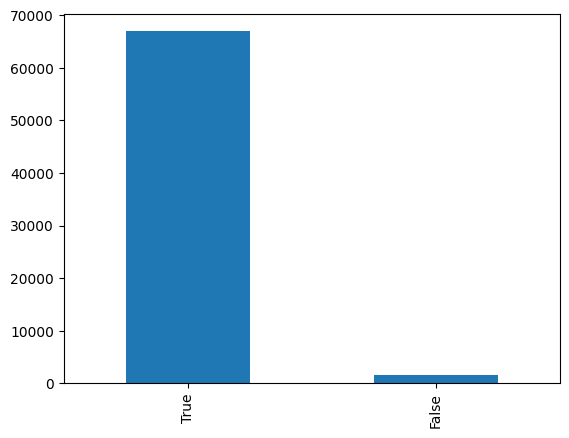

In [ ]:
df["host_has_profile_pic"].value_counts().plot(kind = "bar")

Separate the bedroom into separate bedroom count variables and check the correlation of each of the variables and delay

In [ ]:
for i in range(1,7):
  df["bedroom_count_"+str(i)] = ((df["bedrooms"]>(i-.5)) & (df["bedrooms"]<(i+.5))).astype("bool")

df["bedroom_count_7_+"] = (df["bedrooms"]>6.5).astype("bool")

In [ ]:
for feature in df.columns:
  if feature.startswith("bedroom_count"):
    res = stats.spearmanr(df["delay"], df[feature])
    print("Correlation of delay/{} is {}%".format(feature, abs(res.statistic.round(2))*100))

Correlation of delay/bedroom_count_1 is 24.0%
Correlation of delay/bedroom_count_2 is 28.999999999999996%
Correlation of delay/bedroom_count_3 is 7.000000000000001%
Correlation of delay/bedroom_count_4 is 6.0%
Correlation of delay/bedroom_count_5 is 3.0%
Correlation of delay/bedroom_count_6 is 0.0%
Correlation of delay/bedroom_count_7_+ is 0.0%


Histogram for accomodates

<Axes: >

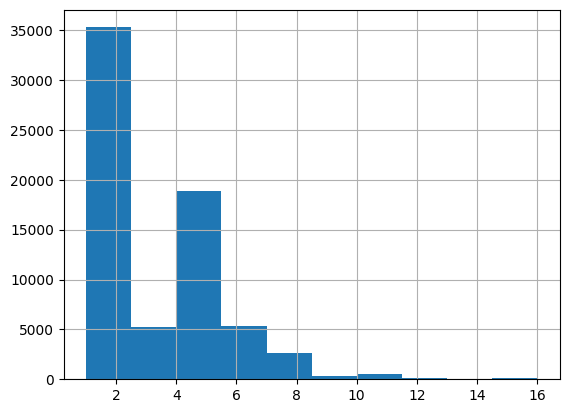

In [ ]:
df["accommodates"].hist()

Create new columns in the dataset for each one of the listings count amount

In [ ]:
for i in range(1,6):
  df["listing_count"+str(i)] = ((df["calculated_host_listings_count"]>(i-.5)) & (df["calculated_host_listings_count"]<(i+.5))).astype("bool")

df["listing_count_6_+"] = (df["calculated_host_listings_count"]>5.5).astype("bool")

In [ ]:
df.dtypes.to_dict()

{'host_response_time': dtype('O'),
 'host_response_rate': dtype('float64'),
 'host_acceptance_rate': dtype('float64'),
 'host_is_superhost': dtype('bool'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('float64'),
 'host_total_listings_count': dtype('float64'),
 'host_has_profile_pic': dtype('bool'),
 'host_identity_verified': dtype('bool'),
 'neighbourhood_cleansed': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'property_type': dtype('O'),
 'room_type': dtype('O'),
 'accommodates': dtype('float64'),
 'bedrooms': dtype('float64'),
 'beds': dtype('float64'),
 'price': dtype('float64'),
 'minimum_nights': dtype('float64'),
 'maximum_nights': dtype('float64'),
 'minimum_minimum_nights': dtype('float64'),
 'maximum_minimum_nights': dtype('float64'),
 'minimum_maximum_nights': dtype('float64'),
 'maximum_maximum_nights': dtype('float64'),
 'minimum_nights_avg_ntm': dtype('float64'),
 'maximum_nights_avg_ntm': dtype('float64'),
 'has_availabi

Count for the different room type when the property has a shared bath

In [ ]:
df[df["shared_bath"] == True]["room_type"].value_counts()

Private room    11324
Shared room       207
Hotel room         16
Name: room_type, dtype: int64

Check the influence of 1 bedroom in the delay

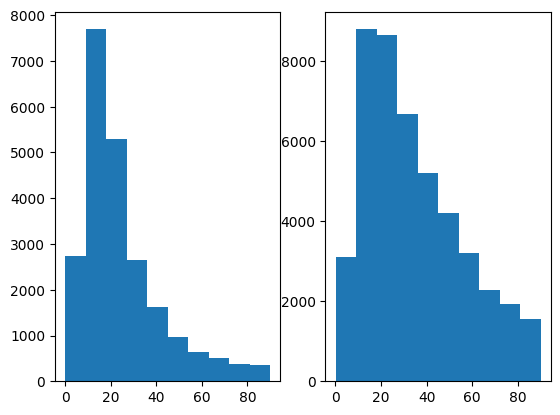

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df[df["bedroom_count_1"] == True]["delay"])
axs[1].hist(df[df["bedroom_count_1"] == False]["delay"])
fig.show()

Check the influence of 4 bedrooms in the delay

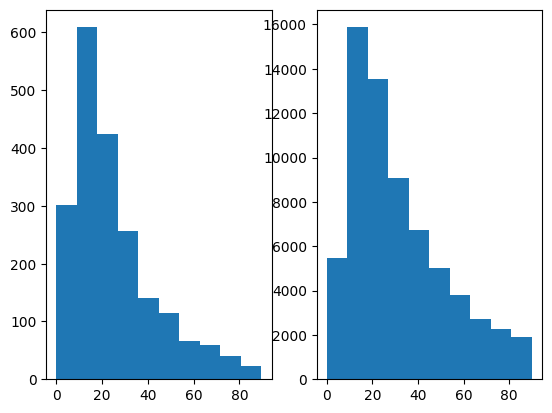

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df[df["bedroom_count_4"] == True]["delay"])
axs[1].hist(df[df["bedroom_count_4"] == False]["delay"])
fig.show()

Check the influence of 2 bedrooms in the delay

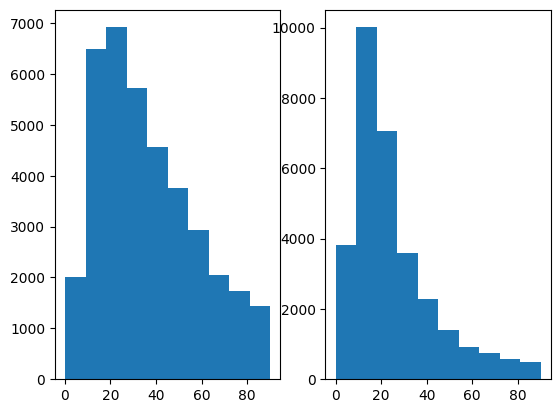

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df[df["bedroom_count_2"] == True]["delay"])
axs[1].hist(df[df["bedroom_count_2"] == False]["delay"])
fig.show()

Check the influence of the shared bath in the delay

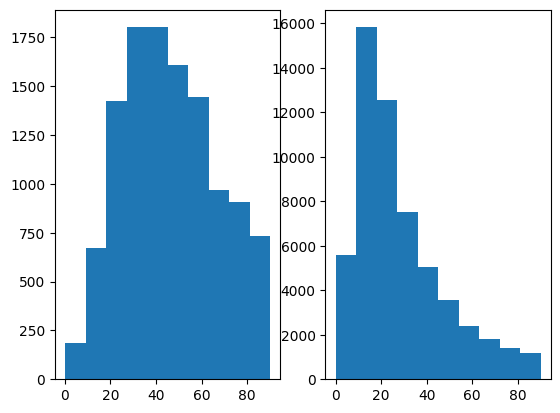

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df[df["shared_bath"] == True]["delay"])
axs[1].hist(df[df["shared_bath"] == False]["delay"])
fig.show()

Histogram when there is a shared bath

<Axes: >

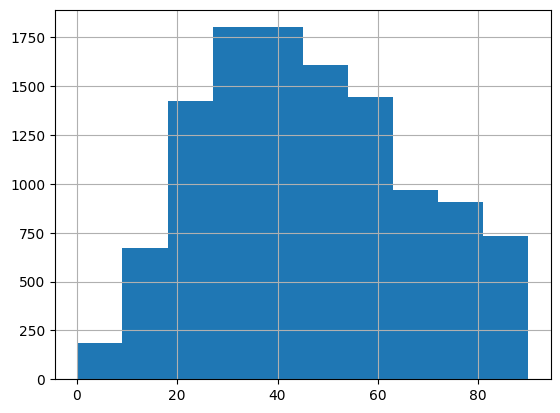

In [ ]:
df[df["shared_bath"] == True]["delay"].hist()

Use the PCA (Principal Component Analysis) to have insights into the spacial structure of the data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[["longitude", "latitude"]])

PCA(n_components=2)

Extract the longitude and latitude transform them using the PCA to reduce dimensionality (noise reduction and try to find underlying patters).

In [ ]:
pca_df = pd.DataFrame(data=pca.transform(df[["longitude", "latitude"]]), columns=['PCA1', 'PCA2'])

In [ ]:
df["PCA1"] = pca_df["PCA1"]
df["PCA2"] = pca_df["PCA2"]

In [ ]:
for feature in df.columns:
  if feature.startswith("PCA"):
    correlation = (df["delay"].corr(df[feature])).round(2)
    print("the correlation between delay and {} is {}%".format(feature, correlation*100))

the correlation between delay and PCA1 is 0.0%
the correlation between delay and PCA2 is 0.0%


In [ ]:
df.dtypes.to_dict()

{'host_response_time': dtype('O'),
 'host_response_rate': dtype('float64'),
 'host_acceptance_rate': dtype('float64'),
 'host_is_superhost': dtype('bool'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('float64'),
 'host_total_listings_count': dtype('float64'),
 'host_has_profile_pic': dtype('bool'),
 'host_identity_verified': dtype('bool'),
 'neighbourhood_cleansed': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'property_type': dtype('O'),
 'room_type': dtype('O'),
 'accommodates': dtype('float64'),
 'bedrooms': dtype('float64'),
 'beds': dtype('float64'),
 'price': dtype('float64'),
 'minimum_nights': dtype('float64'),
 'maximum_nights': dtype('float64'),
 'minimum_minimum_nights': dtype('float64'),
 'maximum_minimum_nights': dtype('float64'),
 'minimum_maximum_nights': dtype('float64'),
 'maximum_maximum_nights': dtype('float64'),
 'minimum_nights_avg_ntm': dtype('float64'),
 'maximum_nights_avg_ntm': dtype('float64'),
 'has_availabi

Scatter plot PCA1 and PCA2

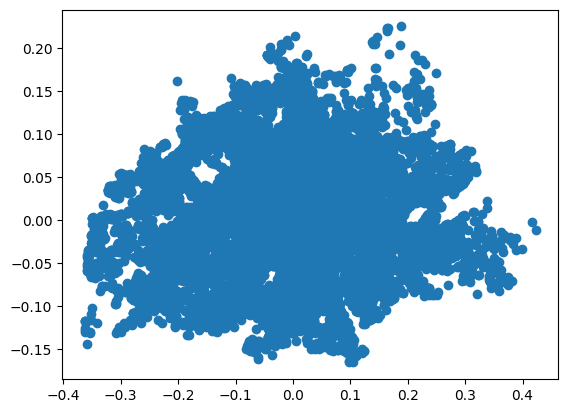

In [ ]:
plt.scatter(df["PCA1"], df["PCA2"])

Verify the variance ratio of each one of the PCAs

In [ ]:
pca.explained_variance_ratio_

array([0.80917966, 0.19082034])

Analysing and comparing the distribution of 'price_estimate' across the nine most common types of properties in the dataset, with the additional criterion that only properties priced below 1000 are considered.

<ipython-input-188-5fbe62e7369e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axs[i//3,i%3].hist(df[df["property_type"] == rtype][df["price"]<1000]["price_estimate"])


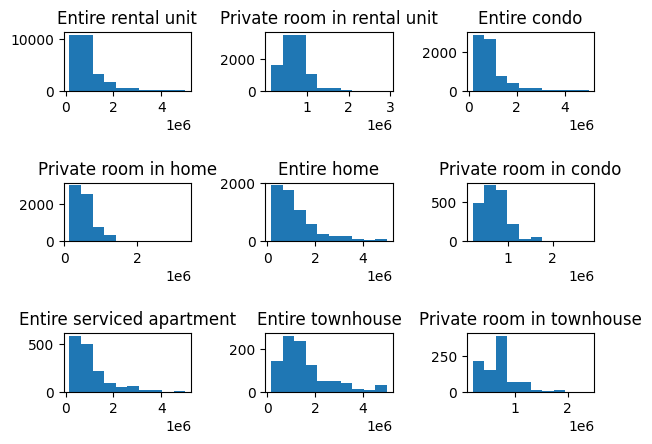

In [ ]:

vals = list(df["property_type"].value_counts()[:9].index.values)

fig, axs = plt.subplots(3, 3)
i = 0
for rtype in vals:
  axs[i//3,i%3].hist(df[df["property_type"] == rtype][df["price"]<1000]["price_estimate"])
  axs[i//3,i%3].set_title ("{}".format(rtype))
  i+=1
fig.tight_layout(pad=2.0)
fig.show()

# Feature engineering

Include features representing both the borough where the property is located and the borough of the property owner. Introduce an additional feature to indicate whether the property's location and the owner's borough are the same.

In [ ]:
df["owner_in_neighbourhood"] = df["neighbourhood_cleansed"] == df["host_neighbourhood"]

Visualising the distribution of 'delay' values specifically for cases where property owners reside in the same neighbourhood as their property.

<Axes: >

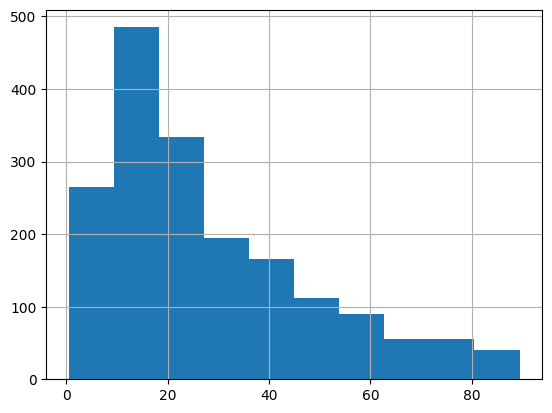

In [ ]:
df[df["owner_in_neighbourhood"] == True]["delay"].hist()

Visualising the distribution of 'delay' values specifically for cases where property owners don't reside in the same neighbourhood as their property.

<Axes: >

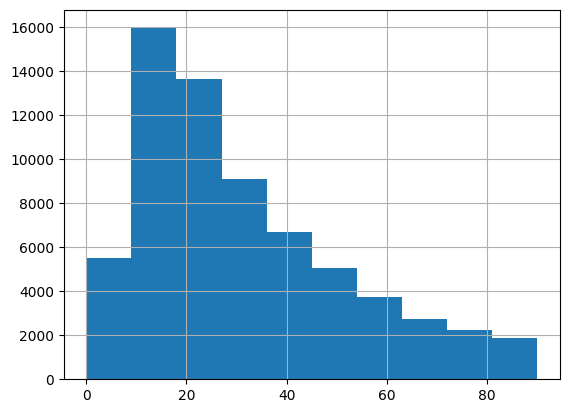

In [ ]:
df[df["owner_in_neighbourhood"] == False]["delay"].hist()

Check the percentage of hots that live in the same neighbourhood as the property

In [ ]:
len(df[df["owner_in_neighbourhood"] == True])/len(df)

0.026271594842063758

Plot the amount of hosts that live in the same neighbourhood as the property

<Axes: >

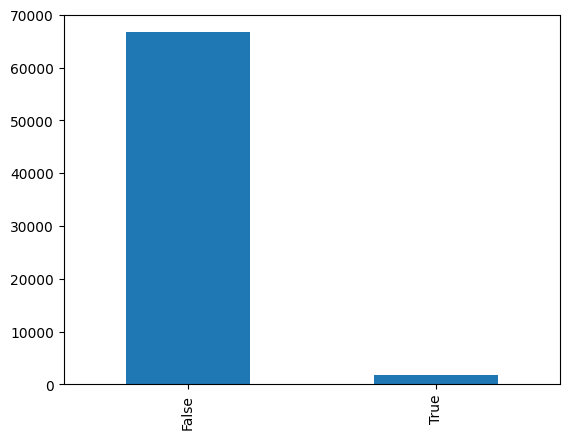

In [ ]:
df["owner_in_neighbourhood"].value_counts().plot(kind = "bar")

In [ ]:
df["owner_in_neighbourhood"].head()

1    False
3    False
4     True
5    False
7    False
Name: owner_in_neighbourhood, dtype: bool

In [ ]:
df.dtypes

host_response_time         object
host_response_rate        float64
host_acceptance_rate      float64
host_is_superhost            bool
host_neighbourhood         object
                           ...   
listing_count5               bool
listing_count_6_+            bool
PCA1                      float64
PCA2                      float64
owner_in_neighbourhood       bool
Length: 79, dtype: object

Check the correlation between the delay and the PCA2

In [ ]:
correlation = (df["delay"].corr(df["amenity_count"])).round(2)
print("the correlation between delay and {} is {}%".format(feature, correlation*100))

the correlation between delay and PCA2 is -9.0%


The next step is to perform one hot encoding for the categorical features. Models like XGBoost cannot deal with categorical features.

Note: We have tried training XGBoost with our data as is. The training accuracy (training RMSE), with the number of training epochs n=10000 turned to be close to 4 months, which would be excellent. However, testing data showed an abysmal RMSE of 120. Meaning the predictions are off by about 10 years. This is a typical case of overfitting. Thus, we need to adress this issue.

# Modelling

In [ ]:
!pip install  xgboost
!pip install lightgbm

Import the xgboost

In [ ]:
import xgboost as xgb

Slip into 70% for training and 30% for testing, and separate the delay variable that is the target varible.

In [ ]:
train, test = df.loc[:len(df)*7//10, :], df.loc[len(df)*7//10:,:]
X_train, X_test, y_train, y_test = train.drop("delay", axis = 1), test.drop("delay", axis = 1),  train["delay"], test["delay"]

In [ ]:
X_train.dtypes.to_dict()

{'host_response_time': dtype('O'),
 'host_response_rate': dtype('float64'),
 'host_acceptance_rate': dtype('float64'),
 'host_is_superhost': dtype('bool'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('float64'),
 'host_total_listings_count': dtype('float64'),
 'host_has_profile_pic': dtype('bool'),
 'host_identity_verified': dtype('bool'),
 'neighbourhood_cleansed': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'property_type': dtype('O'),
 'room_type': dtype('O'),
 'accommodates': dtype('float64'),
 'bedrooms': dtype('float64'),
 'beds': dtype('float64'),
 'price': dtype('float64'),
 'minimum_nights': dtype('float64'),
 'maximum_nights': dtype('float64'),
 'minimum_minimum_nights': dtype('float64'),
 'maximum_minimum_nights': dtype('float64'),
 'minimum_maximum_nights': dtype('float64'),
 'maximum_maximum_nights': dtype('float64'),
 'minimum_nights_avg_ntm': dtype('float64'),
 'maximum_nights_avg_ntm': dtype('float64'),
 'has_availabi

In [ ]:
categorical_features

['host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'property_type']

Identifying and coverting categorical variables in both training and testing sets to the 'category' data type so the XGBppst model can treat these vairables during training.


In [ ]:
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

for col in df.columns:
  if df[col].dtype == "bool":
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

Parameter grid for the XGBoost model

In [ ]:
params = {
    'n_estimators':[200, 300, 350, 400, 450, 500],
    'min_child_weight':[4,5],
    'gamma':[i/10.0 for i in range(3,6)],
    'subsample':[i/10.0 for i in range(6,13)],
    'colsample_bytree':[i/10.0 for i in range(6,13)],
    'max_depth': [2,3,4,5,6,7],
    'objective': ['reg:squarederror'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

Grid search to find the best hyperparameters for the XGBoost regression using the parameters defined in the params dictionary. It optimises based on the negative mean squared error over a 10 fold cross validation.

In [ ]:
folds=10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

estimator = xgb.XGBRegressor(enable_categorical = True, n_estimators = 200)
n_iter_search = 100
g_search = GridSearchCV(estimator, param_grid=params, cv=skf,  scoring='neg_mean_squared_error', verbose = 0)

g_search.fit(X_train, y_train);

In [ ]:
print("Best Parameters Found:", g_search.best_params_)

Best Parameters Found: {'n_estimators': 500, 'min_child_weight': 4, 'gamma': 0.2, 'subsample': 0.1, 'colsample_bytree': 0.7, 'max_depth': 5, 'eta': 0.4}


get the best hyperparameters identified by the grid search and initiliase the XGBoost with the best hyperparameters

In [ ]:
from sklearn.metrics import mean_squared_error
best_params = g_search.best_params_
best_model = xgb.XGBRegressor(**best_params)

Fit the model to the training data

In [ ]:
best_model.fit(X_train, y_train )

Predict on the test dataset, calculate the MSE, RMSE, MAE metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make the predictions
preds = best_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, preds)

# Calculate RMSE
rmse = mean_squared_error(y_test, preds, squared=False)

# Calculate MAE
mae = mean_absolute_error(y_test, preds)

print(f"MSE (Mean Squared Error): {mse:.2f} years^2")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} years")
print(f"MAE (Mean Absolute Error): {mae:.2f} years")


MSE (Mean Squared Error): 5.32 years^2
RMSE (Root Mean Squared Error): 2.34 years
MAE (Mean Absolute Error): 2.52 years


Save the model in a json format

In [ ]:
best_model.save_model("drive/MyDrive/thesis/thesis/model.json")

Load the model from the drive

In [ ]:
model = xgboost.XGBRegressor()
model.load_model("drive/MyDrive/thesis/thesis/model.json")

Feature importance  from the trained best model and create data frame with feature names and their corresponding importance scores

In [ ]:
gain_importance = model.feature_importances_
gain_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Gain': gain_importance})

Feature importance in a bar chart

<BarContainer object of 67 artists>

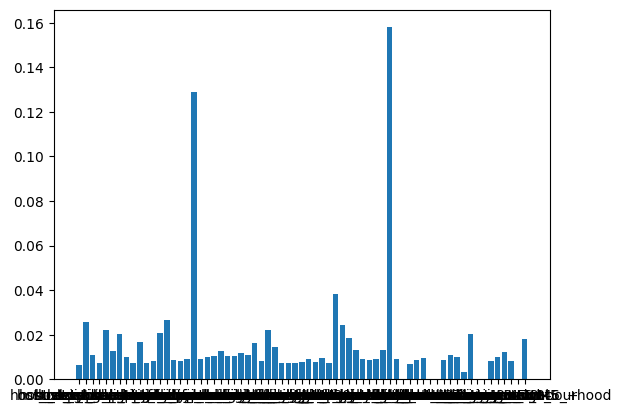

In [ ]:
plt.bar(model.get_booster().feature_names, model.feature_importances_)

Create a data frame table pairing each feature adn the importance score

In [ ]:
importance_df = pd.DataFrame({"feature": model.get_booster().feature_names, "importance":model.feature_importances_})

Sort and print in descending order and select the top 30 most important features

In [ ]:
importance_df.sort_values(by = ["importance"], ascending = False).head(30)

,feature,importance
46,price_estimate,0.158057
17,price,0.129047
38,calculated_host_listings_count,0.038374
13,room_type,0.026758
1,host_response_rate,0.025621
39,calculated_host_listings_count_entire_homes,0.024412
4,host_neighbourhood,0.021955
28,number_of_reviews_ltm,0.021954
12,property_type,0.020925
6,host_total_listings_count,0.020075
